# Linear regression using the Normal Equation

### Random Numbers in numpy (random.rand ,random.randn) 

In [1]:
import numpy as np
# np.random.rand?
# Random values in a given shape.
# Create an array of the given shape and populate it with
# random samples from a uniform distribution
# over ``[0, 1)``.

X=3*np.random.rand(1,100)

0.00378678418359 1.00248148344


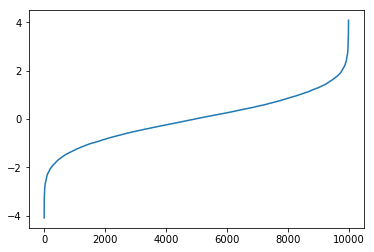

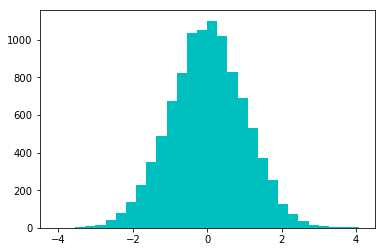

In [2]:
np.random.randn(10)
#Return a sample (or samples) from the "standard normal" distribution.
import matplotlib.pyplot as plt
y=np.sort(np.random.randn(10000))
x = np.arange(len(y))
print(np.mean(y),np.std(y),)
plt.plot(x,y)
plt.show()
plt.hist(y, 30,  facecolor='c', alpha=1)
plt.show()

# L1 and L2 Norm of a Vector 

L1-norm is also known as least absolute deviations (LAD), least absolute errors (LAE). It is basically minimizing the sum of the absolute differences (S) between the target value (Yi) and the estimated values (f(xi)):
![t](l1-norm-formula.png)

L2-norm is also known as least squares. It is basically minimizing the sum of the square of the differences (S) between the target value (Yi) and the estimated values (f(xi):
![t](l2-norm-formula.png)

# Linear regression 

![Linear Regression model prediction (vectorized form)](eq_12.png)

### MSE cost function for a Linear Regression model 

![title](eq_20.png)

# Normal Eqn 

![title](eq_14.png)

In [3]:
import numpy as np
X1=np.random.rand(100,1)
# X0 = np.random.rand(100,1)
# X_b = np.c_[X0,X1]

In [4]:
y = 4+ 3*X1 + np.random.randn(100, 1)
X_b = np.c_[np.ones((100,1)),X1]

In [5]:
y.shape

(100, 1)

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #Normal equation
print(theta_best.T)

[[ 3.9702111   3.11303354]]


In [7]:
 np.random.randn(2,5)

array([[ 0.88756323, -0.96205827,  2.36318093, -0.55714605, -0.73314719],
       [-1.44650578,  0.25379789,  0.41073311,  1.03086896, -1.00855231]])

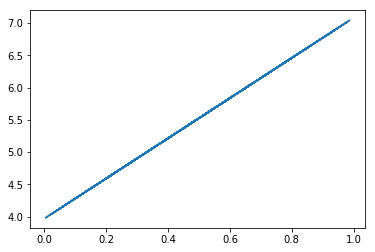

[[ 7.08324465]]


In [8]:
import matplotlib.pyplot as plt
y_predict = X_b.dot(theta_best)
plt.plot(X1,y_predict)
plt.show()

y_7 = np.array([[1,1]]).dot(theta_best)
print(y_7)

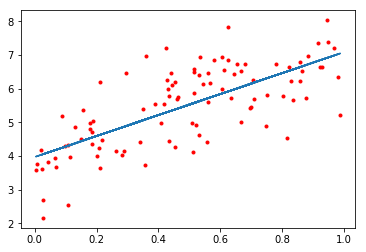

In [9]:
plt.plot(X1,y,'r.')
plt.plot(X1,y_predict)
plt.show()

In [10]:
X_new = np.c_[np.random.rand(2,1),np.random.rand(2,1)]
X_new

array([[ 0.38215073,  0.78241555],
       [ 0.62214307,  0.22084334]])

In [11]:
y_predict = X_new.dot(theta_best)
y_predict

array([[ 3.95290492],
       [ 3.15753207]])

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_b,y)
lin_reg.coef_

array([[ 0.        ,  3.11303354]])

# Linear regression using batch gradient descent

## Gradient vector of the cost function

![title](eq_21.png)

**Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step.**

# Gradient Descent step

![title](eq_22.png)

In [13]:
i=1
for _ in range(4):
    print(i)

1
1
1
1


In [14]:
theta_path_bgd = []
lr_eta=.1
theta1 = np.random.randn(2,1) #Coloumn vector
m=100
itration = 1000
plt.plot(X1,y,'r.')
for itr in range(itration):
    delta_theta=2/m*(X_b.T.dot(X_b.dot(theta1)-y))
    theta1 = theta1 - lr_eta*delta_theta
    theta_path_bgd.append(theta1)
print(theta1)

[[ 3.97021093]
 [ 3.11303388]]


# Plotting graph 

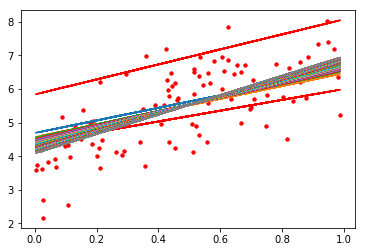

[[ 4.08414348]
 [ 2.890656  ]]


In [15]:
lr_eta=.5
theta1 = np.random.randn(2,1) #Coloumn vector
m=100
itration = 30
plt.plot(X1,y,'r.')
for itr in range(itration):
    delta_theta=(2/m)*(X_b.T.dot(X_b.dot(theta1)-y))
    theta1 = theta1 - lr_eta*delta_theta
    if itr < 2000 :
        y_predict = X_b.dot(theta1)
        if itr <= 1:
            plt.plot(X1,y_predict,'r-')
        else:
            plt.plot(X1,y_predict)
plt.show()
print(theta1)

# Stochastic Gradient Descent 

Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. 
When the cost function is very irregular , this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule

In [16]:
def lerning_schedule(t0,t1,t2):
    return t0/(t1+t2)
theta_path_sgd = []
n_epochs = 50
m=100
theta = np.random.rand(2,1)
print(theta)

for ep in range(n_epochs):
    for i in range(m):
        rand_index = np.random.randint(m)
        xi = X_b[rand_index:rand_index+1]
        yi= y[rand_index:rand_index+1]
        delta_theta=2*(xi.T.dot(xi.dot(theta)-yi))
        theta = theta - lerning_schedule(5,50,ep*m+i)*delta_theta
        theta_path_sgd.append(theta)
print(theta)

[[ 0.82265718]
 [ 0.96788559]]
[[ 3.99526099]
 [ 3.12541544]]


### Plot

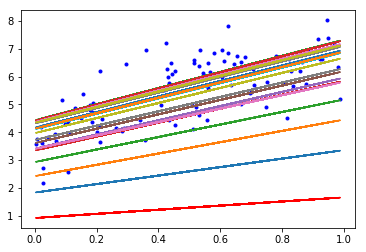

In [17]:
plt.plot(X1,y,'b.')
theta = np.random.rand(2,1)
for ep in range(n_epochs):
    for i in range(m):
        rand_index = np.random.randint(m)
        xi = X_b[rand_index:rand_index+1]
        yi= y[rand_index:rand_index+1]
        delta_theta=2*(xi.T.dot(xi.dot(theta)-yi))
        theta = theta - lerning_schedule(5,50,ep*m+i)*delta_theta
        if ep==0 and i < 20:
            y_pred = X_b.dot(theta)
            if i==0:
                plt.plot(X1,y_pred,'r-')
            else:
                plt.plot(X1,y_pred)
plt.show()

## SGD Using scikit

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_regr = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_regr.fit(X1,y.ravel())
sgd_regr.coef_,sgd_regr.intercept_

(array([ 3.11512506]), array([ 3.98245623]))

# Mini-batch Gradient Descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

In [19]:
n_epochs = 50
m=100
theta = np.random.rand(2,1)
minibatch=20
print(theta)

theta_path_mgd = []
for ep in range(n_epochs):
    shuffled_index=np.random.permutation(m)
    shufled_X=X_b[shuffled_index]
    shufled_y=y[shuffled_index]
    t=0
    for i in range(0,m,minibatch):
        t+=1
        x_mini_batch = shufled_X[i:i+minibatch]
        y_mini_batch= shufled_y[i:i+minibatch]
        
        delta_theta=2*(x_mini_batch.T.dot(x_mini_batch.dot(theta)-y_mini_batch))
        theta = theta - lerning_schedule(10,1000,t)*delta_theta
        theta_path_mgd.append(theta)
print(theta)

[[ 0.17759714]
 [ 0.54708801]]
[[ 4.01824927]
 [ 3.12335598]]


In [20]:
a=np.array([1,2,3,4])
a[1:88]

array([2, 3, 4])

In [21]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

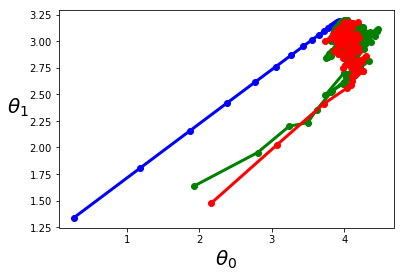

In [22]:
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],"b-o", linewidth=3, label="Batch")
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"g-o", linewidth=3, label="Batch")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"r-o", linewidth=3, label="Batch")

# plt.axis([2.5, 4.5, 2.3, 3.9])
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.show()

# Polynomial Regression


What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

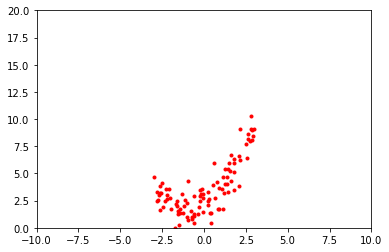

In [23]:
m=100
X=np.random.rand(m,1)*6 -3
y= .5 * X**2 +X+ 2+np.random.randn(100,1)
plt.plot(X,y,'r.')
plt.axis([-10,10,0,20])
plt.show()

In [24]:
# from sklearn.preprocessing import PolynomialFeatures,StandardScaler
# std_scaler=StandardScaler()
# poly_feature = PolynomialFeatures(degree=300,include_bias=False)

# X_poly=poly_feature.fit_transform(X)
# X_poly_scaled =std_scaler.fit_transform(X_poly)
# # print(X[0],X_poly[0])

In [25]:
# lin_reg=LinearRegression()
# lin_reg.fit(X_poly_scaled,y)
# # lin_reg.coef_,lin_reg.intercept_

# Pipeline Vs single steps
http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit

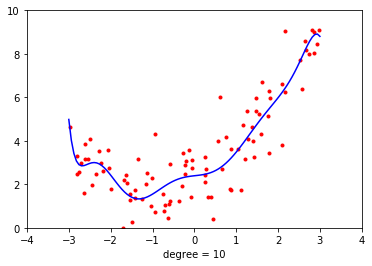

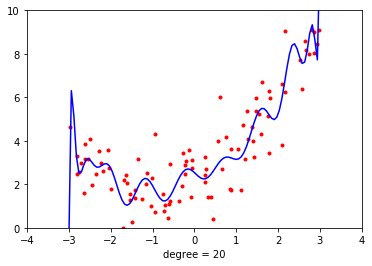

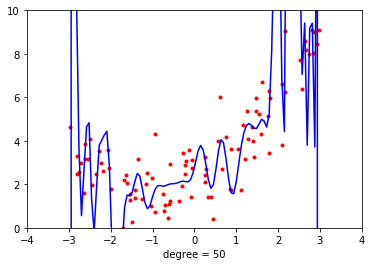

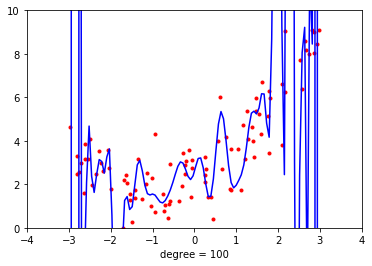

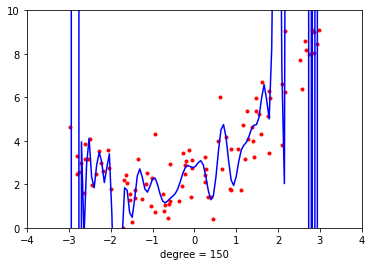

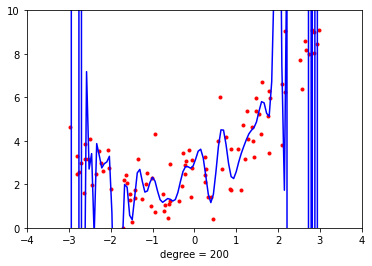

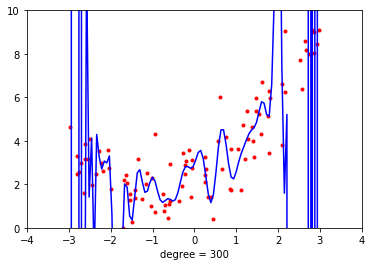

In [26]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

for degree in (10,20,50,100,150,200,300):
    std_scaler=StandardScaler()
    poly_feature = PolynomialFeatures(degree=degree,include_bias=False)
    lin_reg=LinearRegression()

    X_poly=poly_feature.fit_transform(X,y)
    X_poly_scaled =std_scaler.fit_transform(X_poly,y)

    lin_reg.fit(X_poly_scaled,y)


    X_new=np.linspace(-3,3,100).reshape(100,1)

    X_new_poly = poly_feature.transform(X_new)
    X_new_ploy_scaled=std_scaler.transform(X_new_poly)

    y_new=lin_reg.predict(X_new_ploy_scaled)
    #print(y_new)

    plt.plot(X,y,'r.')
    plt.plot(X_new,y_new,'b-')
    plt.axis([-4,4,0,10])
    plt.xlabel("degree = {0}".format(str(degree)))
    plt.show()


#--------------Same using Pipeline :
# polynomial_regression = Pipeline((("poly_features", poly_feature),("std_scaler", std_scaler),("lin_reg", lin_reg),))
# polynomial_regression.fit(X,y)
# ybig=polynomial_regression.predict(X_new)

# plt.plot(X,y,'r.')
# plt.plot(X_new,ybig,'b-')
# plt.axis([-4,4,0,10])
# plt.show()

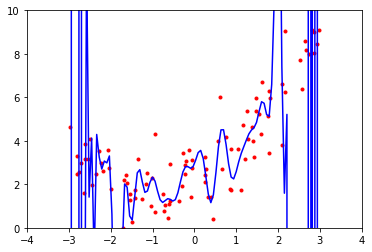

In [27]:
polybig_features = PolynomialFeatures(degree=300, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
polynomial_regression = Pipeline((("poly_features", polybig_features),("std_scaler", std_scaler),("lin_reg", lin_reg),))
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
# print(y_newbig)
plt.plot(X,y,'r.')
plt.plot(X_new,y_newbig,'b-')
plt.axis([-4,4,0,10])
plt.show()

Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab2.

True
float64


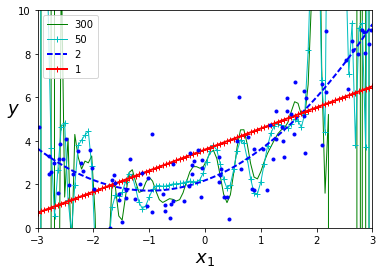

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
print(np.isfinite(X).all())
print(X.dtype)

for style, width, degree in (("g-", 1, 300),("c-+", 1, 50), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline((
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),))
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves

3.03352520687 2.88868348262


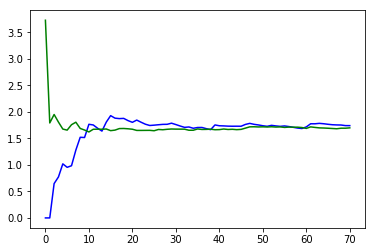

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

set_size = [10,20,30,40,50,60,70,80,90]
mse_train_set = []
mse_test_set=[]

X_train, X_test, y_train, y_test=train_test_split(X[:sz],y[:sz],test_size=0.2)

for m in range(1,len(X_train)):
    lin_reg.fit(X_train[:m],y_train[:m])
    y_train_pred = lin_reg.predict(X_train[:m])
    y_test_pred=lin_reg.predict(X_test)

    mse_train=mean_squared_error(y_train_pred,y_train[:m])
    
    mse_test=mean_squared_error(y_test_pred,y_test)
    
    mse_train_set.append(np.sqrt(mse_train))
    mse_test_set.append(np.sqrt(mse_test))
    

print(mse_train,mse_test)

plt.plot(np.array(mse_train_set),'b-')
plt.plot(np.array(mse_test_set),'g-')
plt.show()
